In [83]:
# corner is the junction of two edges and edge is a sudden change
# harris corner detection is basic one
# shi-Thomasi corner detection is advance one which is modification of harris corner detection 

In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# corner harris detection want array in floating point number and single channel

In [86]:
def load():
    orig = cv2.imread('data/flat_chessboard.png', 0)
#     orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = np.float32(orig)
    global img
    img = orig.copy()

In [87]:
def imshow(image):
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap='gray')

In [88]:
load()

#  <u>Harris corner detection</u>

### On simulation based chess board

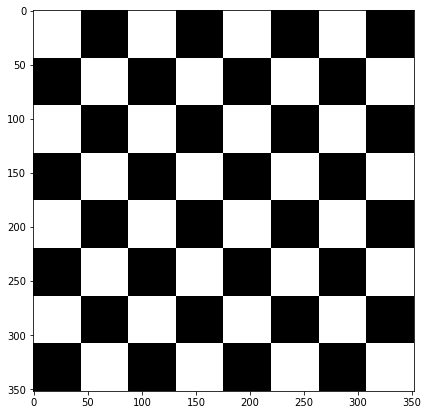

In [89]:
imshow(img)

In [90]:
img.dtype

dtype('float32')

In [91]:
# k = 0.04 default and 
destination = cv2.cornerHarris(img, 2, 5, 0.04)

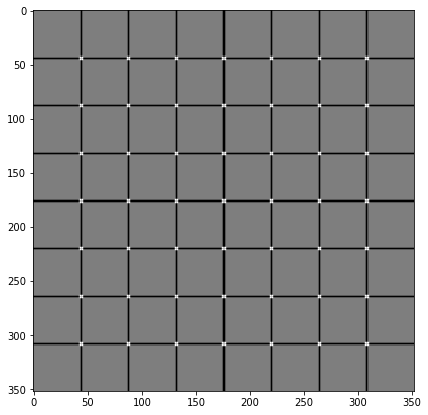

In [92]:
imshow(destination)

**Plotting corners**

In [45]:
# dilation is used to bubble up the corner not related to harris corner detection

In [117]:
dila_dest = cv2.dilate(destination, (5,5))
# dila_dest = cv2.dilate(destination, None)

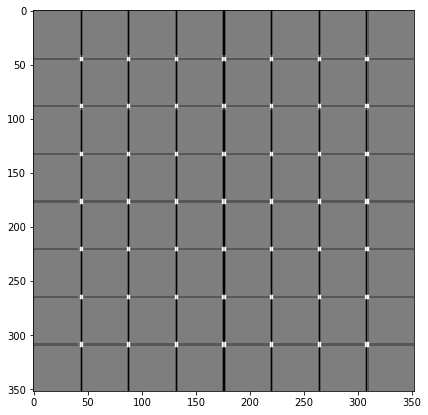

In [118]:
imshow(dila_dest)

In [111]:
# So most likely cv2.cornerHarris returns a value for confidence in it's own prediction. 
# And with dst>0.01*dst.max() the code filters corners that are only "low-confidence-corners".
# Any corner that is detected will just be marked as a corner if the confidence is higher than 1% of the highest confidence.

In [119]:
orig = cv2.imread('data/flat_chessboard.png')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

In [120]:
orig[dila_dest>0.01*dila_dest.max()] = [255, 0, 0] #RGB

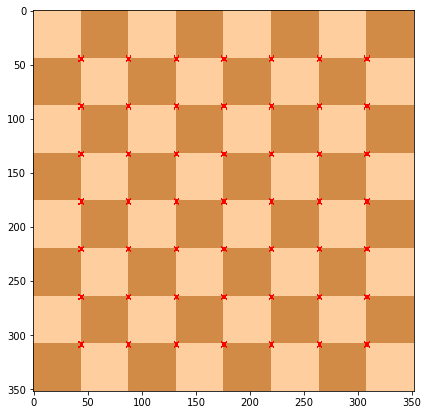

In [121]:
imshow(orig)

## On Real Life Chess Board

In [129]:
def load():
    orig = cv2.imread('data/real_chessboard.jpg', 0)
#     orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = np.float32(orig)
    global img
    img = orig.copy()

In [130]:
load()

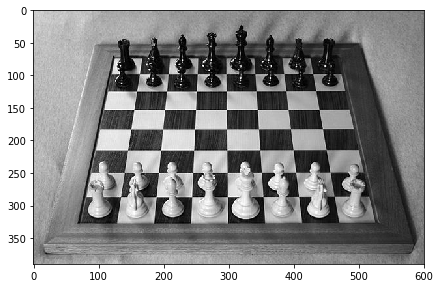

In [131]:
imshow(img)

In [140]:
# dont know how to modify these parameters

In [149]:
dest = cv2.cornerHarris(img, 4, 5, k=0.04)

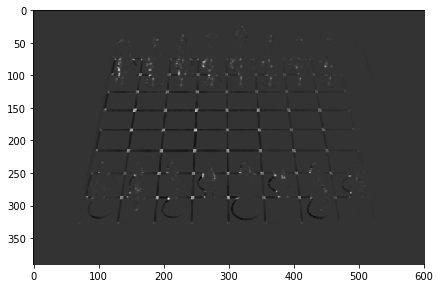

In [150]:
imshow(dest)

In [151]:
dest = cv2.dilate(dest, None)

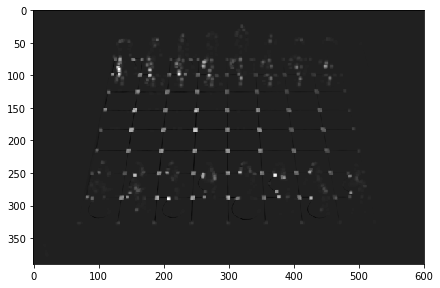

In [152]:
imshow(dest)

In [153]:
orig = cv2.imread('data/real_chessboard.jpg')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

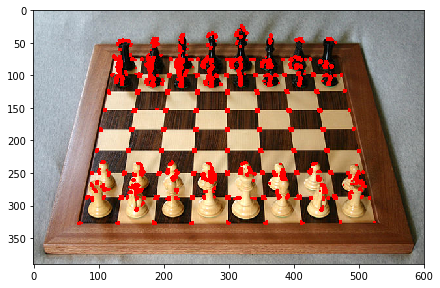

In [154]:
orig[dest>0.01*dest.max()] = [255, 0, 0]  #RGB
imshow(orig)

# Shi-Thomasi --> goodFeatureToTrack

## on simulation

In [189]:
def load():
    orig = cv2.imread('data/flat_chessboard.png', 0)
#     orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = np.float32(orig)
    global img
    img = orig.copy()

In [190]:
load()

In [209]:
# maxCorners = 0 if want to detect all corners (n)
# quality = on the basis of this quality top n corners will be selected (good point to start is 0.01=1%)
# minDistance=10 (good point to start)

corners = cv2.goodFeaturesToTrack(image=img, maxCorners=3, qualityLevel=0.01, minDistance=10)

In [211]:
corners  # 3 rows means 3 corners. 2 columns means x and y cordinate

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]]], dtype=float32)

In [212]:
# converting to integer
corners = corners.astype(int)

In [213]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]]])

In [214]:
orig = cv2.imread('data/flat_chessboard.png')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

In [215]:
for i in corners:
    x, y = i.ravel()  # this will seperate x and y from 2d array
    cv2.circle(orig, (x, y), 5, (0, 0, 255), -1)    

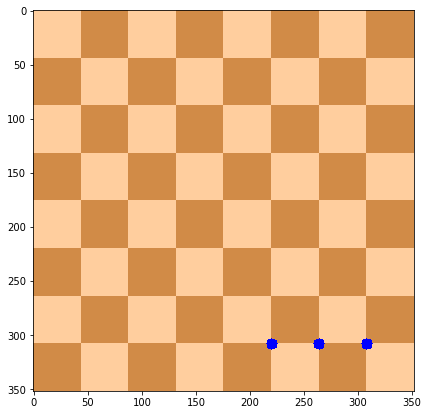

In [216]:
imshow(orig)